<a href="https://colab.research.google.com/github/kazuma313/everyday_coding/blob/main/StudyDeeper/ArtificialIntellegent/TensorFlow/NeuralNetwork/06_ScalingUp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scaling up
sebelumnya telah dilakukan percobaan transfer learning dengan menggunakan dataset yang sedikit. pada kesempatan kali ini akan dilakukan percobaan menggunakan dataset yang lebih banyak. percobaan kali ini menggunakan 101 label pada dataset.

In [ ]:
import datetime
print(datetime.datetime.now())

2023-10-07 14:58:36.125575


In [ ]:
!nvidia-smi

Sat Oct  7 14:58:36 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


--2023-10-07 14:58:36--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-10-07 14:58:36 (79.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

unzip_data("101_food_classes_10_percent.zip")

train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

--2023-10-07 14:58:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.207, 74.125.135.207, 74.125.142.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   111MB/s    in 16s     

2023-10-07 14:58:56 (95.3 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [ ]:
walk_through_dir("101_food_classes_10_percent")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/test'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/lobster_bisque'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/donuts'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/cheese_plate'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/foie_gras'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/filet_mignon'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/hummus'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/risotto'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/baby_back_ribs'.
There are 0 directories and 250 images in '101_food_cla

In [ ]:
import tensorflow as tf


In [ ]:
image_size= (224, 224)

train_data= tf.keras.preprocessing.image_dataset_from_directory(directory= train_dir,
                                                                label_mode= 'categorical',
                                                                image_size= image_size,
                                                                batch_size= 32)

test_data= tf.keras.preprocessing.image_dataset_from_directory(directory= test_dir,
                                                               label_mode= 'categorical',
                                                               image_size= image_size,
                                                               batch_size= 32,
                                                               shuffle= False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [ ]:
checkpoint= "model_checkpoint/checkpoint.ckpt"

checkpoint_callback= tf.keras.callbacks.ModelCheckpoint(filepath= checkpoint,
                                                        save_best_only= True,
                                                        save_weights_only= True,
                                                        save_freg= "epoch",
                                                        monitor= "val_accuracy",
                                                        verbose=1)

mari coba fine tunning dari awal

In [ ]:
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)
base_model.trainable = False


16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
# unfreeze 5 layer terakhir
for layer in base_model.layers[-5:]:
  layer.trainable= True

In [ ]:
for layer in base_model.layers:
  print(layer.name, layer.trainable)

input_1 False
rescaling False
normalization False
rescaling_1 False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv_pad False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_dwconv False
block2b_bn False
block2b_activation False
block2b_se_squeeze False
block2b_se_reshape False
block2b_se_reduce False
block2b_se_expand False
block2b_se_excite False
block2b_proj

In [ ]:
base_model

In [ ]:
input= tf.keras.layers.Input(shape= image_size + (3,), name= "input_layers")
print(input.shape)
x= base_model(input)
print(x.shape)
x= tf.keras.layers.GlobalAveragePooling2D(name="AveragePooling2D")(x)
print(x.shape)
outputs= tf.keras.layers.Dense(len(train_data.class_names), activation= "softmax", name= "output_layers")(x)
print(outputs.shape)

model= tf.keras.Model(input, outputs)



(None, 224, 224, 3)
(None, 7, 7, 1280)
(None, 1280)
(None, 101)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layers (InputLayer)   [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 AveragePooling2D (GlobalAv  (None, 1280)              0         
 eragePooling2D)                                                 
                                                                 
 output_layers (Dense)       (None, 101)               129381    
                                                                 
Total params: 4178952 (15.94 MB)
Trainable params: 129381 (505.39 KB)
Non-trainable params: 4049571 (15.45 MB)
_________________________________________________________________


In [ ]:
for layer in model.layers:
  print(layer.name, layer.trainable)

input_layers True
efficientnetb0 False
AveragePooling2D True
output_layers True


In [ ]:
model.compile(loss= tf.keras.losses.categorical_crossentropy,
              optimizer= tf.keras.optimizers.Adam(0.0001),
              metrics= [['accuracy', 'mse']]
              )

In [ ]:
history= model.fit(train_data,
          epochs= 10,
          steps_per_epoch= len(train_data),
          validation_data= test_data,
          validation_steps= len(test_data),
          verbose= 1,
          callbacks= [checkpoint_callback])

Epoch 1/10
237/237 [==============================] - ETA: 0s - loss: 4.4180 - accuracy: 0.0580 - mse: 0.0098
Epoch 1: val_accuracy improved from -inf to 0.15006, saving model to model_checkpoint/checkpoint.ckpt
237/237 [==============================] - 90s 319ms/step - loss: 4.4180 - accuracy: 0.0580 - mse: 0.0098 - val_loss: 4.1011 - val_accuracy: 0.1501 - val_mse: 0.0096
Epoch 2/10
237/237 [==============================] - ETA: 0s - loss: 3.9205 - accuracy: 0.2147 - mse: 0.0096
Epoch 2: val_accuracy improved from 0.15006 to 0.30800, saving model to model_checkpoint/checkpoint.ckpt
237/237 [==============================] - 72s 302ms/step - loss: 3.9205 - accuracy: 0.2147 - mse: 0.0096 - val_loss: 3.6563 - val_accuracy: 0.3080 - val_mse: 0.0094
Epoch 3/10
237/237 [==============================] - ETA: 0s - loss: 3.5280 - accuracy: 0.3502 - mse: 0.0093
Epoch 3: val_accuracy improved from 0.30800 to 0.39370, saving model to model_checkpoint/checkpoint.ckpt
237/237 [=================

In [ ]:
evaluation= model.evaluate(test_data)
evaluation

790/790 [==============================] - 56s 70ms/step - loss: 2.1346 - accuracy: 0.5507 - mse: 0.0070


[2.134643316268921, 0.5506534576416016, 0.006965131498873234]

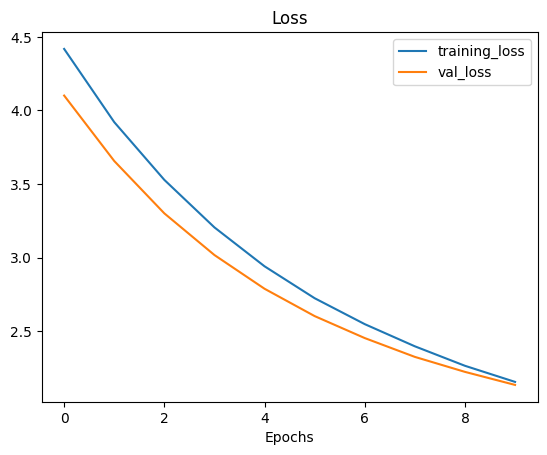

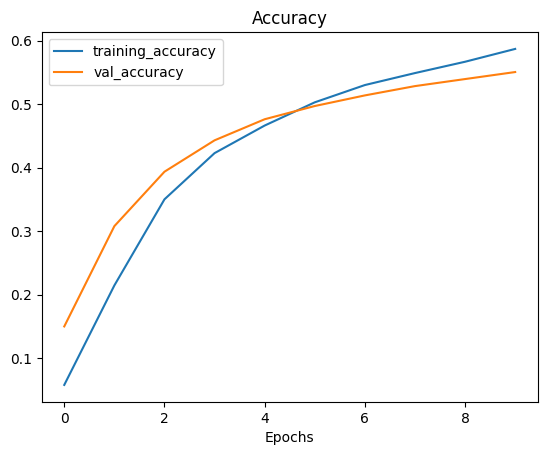

In [ ]:
plot_loss_curves(history)

hasilnya cukup bagus

In [ ]:
pred_prob= model.predict(test_data, verbose= 1)

790/790 [==============================] - 69s 84ms/step


In [ ]:
print(f"kemungkinan prediksi pada sample 0: {pred_prob[0].argmax()}")

kemungkinan prediksi pada sample 0: 2


In [ ]:
pred_classes= pred_prob.argmax(axis= 1)

In [ ]:
pred_classes[:10]

array([ 2, 41, 80, 80, 34, 78, 29, 46,  9, 41])

In [ ]:
y_labels= []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())
y_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy

0.5506534653465347

In [ ]:
class_names = test_data.class_names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [ ]:
# Plot a confusion matrix with all 25250 predictions, ground truth labels and 101 classes
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=20,
                      norm=False,
                      savefig=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.38      0.07      0.12       250
           1       0.45      0.71      0.55       250
           2       0.56      0.51      0.54       250
           3       0.52      0.63      0.57       250
           4       0.40      0.39      0.39       250
           5       0.41      0.26      0.31       250
           6       0.55      0.82      0.66       250
           7       0.72      0.77      0.74       250
           8       0.34      0.32      0.33       250
           9       0.41      0.62      0.49       250
          10       0.48      0.40      0.44       250
          11       0.43      0.62      0.51       250
          12       0.65      0.54      0.59       250
          13       0.50      0.46      0.48       250
          14       0.62      0.49      0.55       250
          15       0.38      0.11      0.17       250
          16       0.58      0.57      0.57       250
          17       0.36    

In [ ]:
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'precision': 0.375,
  'recall': 0.072,
  'f1-score': 0.12080536912751676,
  'support': 250},
 '1': {'precision': 0.4517766497461929,
  'recall': 0.712,
  'f1-score': 0.5527950310559007,
  'support': 250},
 '2': {'precision': 0.5638766519823789,
  'recall': 0.512,
  'f1-score': 0.5366876310272538,
  'support': 250},
 '3': {'precision': 0.5249169435215947,
  'recall': 0.632,
  'f1-score': 0.573502722323049,
  'support': 250},
 '4': {'precision': 0.3967611336032389,
  'recall': 0.392,
  'f1-score': 0.39436619718309857,
  'support': 250},
 '5': {'precision': 0.40764331210191085,
  'recall': 0.256,
  'f1-score': 0.3144963144963145,
  'support': 250},
 '6': {'precision': 0.5498652291105122,
  'recall': 0.816,
  'f1-score': 0.6570048309178744,
  'support': 250},
 '7': {'precision': 0.7164179104477612,
  'recall': 0.768,
  'f1-score': 0.7413127413127413,
  'support': 250},
 '8': {'precision': 0.3448275862068966,
  'recall': 0.32,
  'f1-score': 0.33195020746887965,
  'support': 250},
 '9

In [ ]:
class_f1_scores = {}
for k, v in classification_report_dict.items():
  if k == "accuracy":
    break
  else:
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'apple_pie': 0.12080536912751676,
 'baby_back_ribs': 0.5527950310559007,
 'baklava': 0.5366876310272538,
 'beef_carpaccio': 0.573502722323049,
 'beef_tartare': 0.39436619718309857,
 'beet_salad': 0.3144963144963145,
 'beignets': 0.6570048309178744,
 'bibimbap': 0.7413127413127413,
 'bread_pudding': 0.33195020746887965,
 'breakfast_burrito': 0.49201277955271566,
 'bruschetta': 0.43763676148796493,
 'caesar_salad': 0.5064935064935064,
 'cannoli': 0.587719298245614,
 'caprese_salad': 0.4779874213836478,
 'carrot_cake': 0.5478841870824053,
 'ceviche': 0.16770186335403728,
 'cheese_plate': 0.5725806451612903,
 'cheesecake': 0.29383886255924174,
 'chicken_curry': 0.31693989071038253,
 'chicken_quesadilla': 0.5951940850277265,
 'chicken_wings': 0.6758349705304518,
 'chocolate_cake': 0.3956043956043956,
 'chocolate_mousse': 0.28899082568807344,
 'churros': 0.6829268292682927,
 'clam_chowder': 0.6519337016574585,
 'club_sandwich': 0.5800376647834276,
 'crab_cakes': 0.32372505543237245,
 'creme

In [ ]:
import pandas as pd
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores.head()

class_name  f1-score
33    edamame  0.958580
63   macarons  0.836439
32  dumplings  0.804688
65    mussels  0.778443
86    sashimi  0.774319

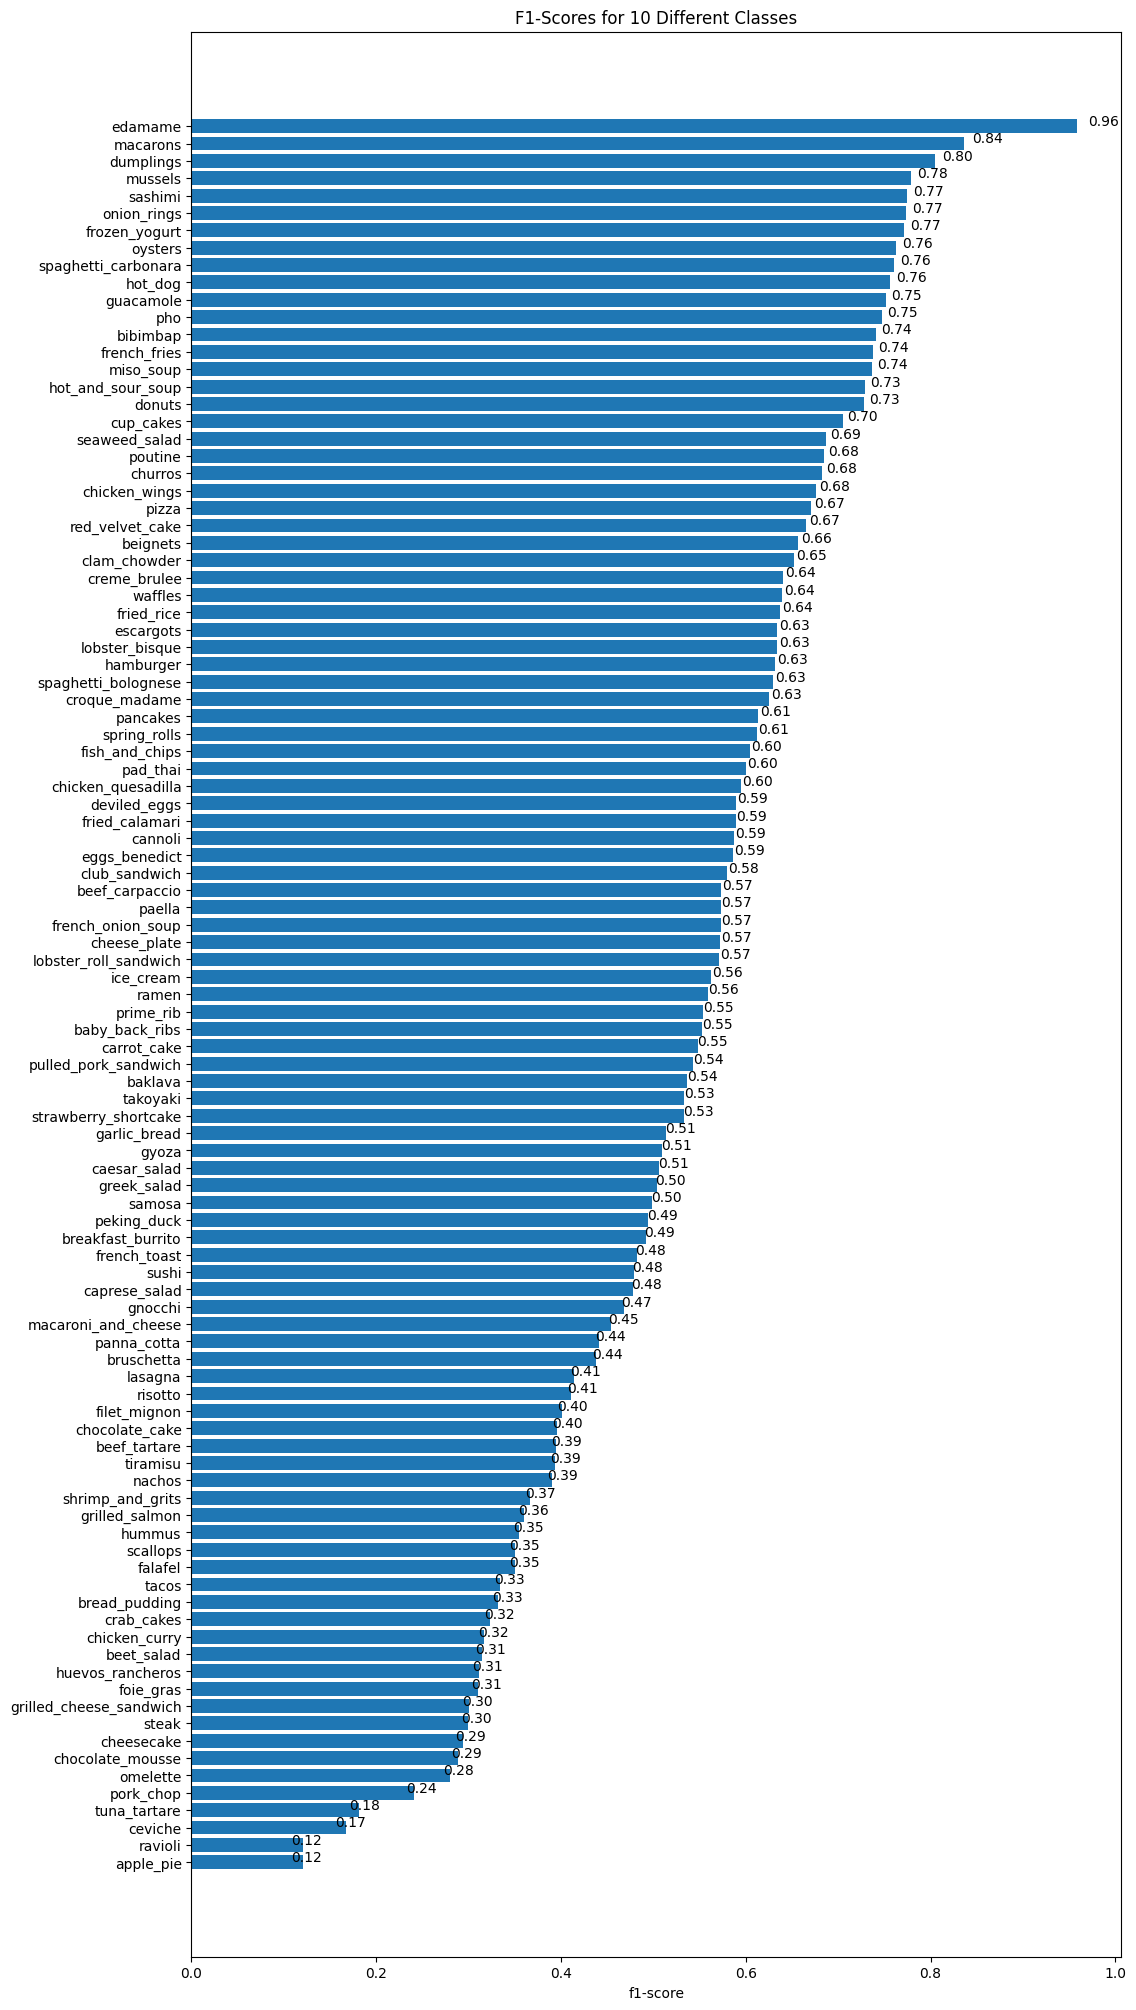

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis(); # reverse the order

def autolabel(rects): # Modified version of: https://matplotlib.org/examples/api/barchart_demo.html
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)

In [ ]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

1/1 [==============================] - 0s 27ms/step


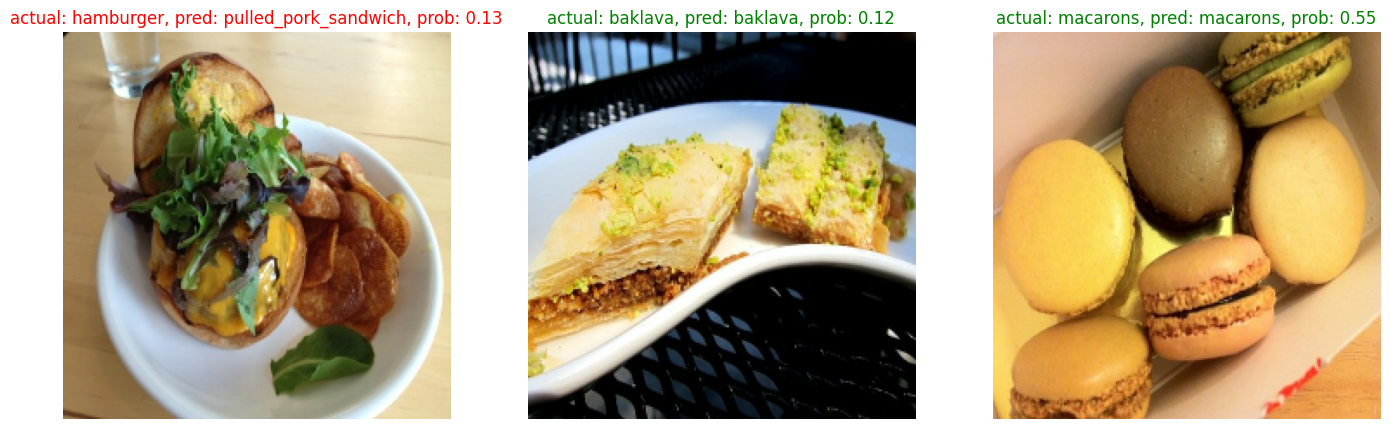

In [ ]:

import os
import random

plt.figure(figsize=(17, 10))
for i in range(3):

  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename

  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class

  # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);